<a href="https://colab.research.google.com/github/gentomacine/datascience_wrexham/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import requests
import json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Extract headlines using the provided API
api_key = '8gUiNaBzsyNQWLEGZpsAcKAz0i4MFuAB'
keyword = 'pig+farming'

url = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={keyword}&fq=headline:{keyword}&api-key={api_key}'
response = requests.get(url)
data = json.loads(response.text)

# Extract headlines from the API response
headlines = []
for doc in data['response']['docs']:
    headlines.append(doc['headline']['main'])

# Display extracted headlines
print("Extracted Headlines:")
print(headlines)

Extracted Headlines:
['Pig Farming Doesn’t Have to Be This Cruel', 'Meat Plant Closures Mean Pigs Are Gassed or Shot Instead', 'China’s Bid to Improve Food Production? Giant Towers of Pigs.', 'The Truth About Your Bacon', 'Welcome to the Farm! Prepare to Get Dirty and Be Dazzled.', 'Life After Factory Farming: ‘The Longer They’re Out, the Happier They Are.’', 'The Farming Conundrum', 'How the Shock of Catastrophic Floods Is Changing Farming in Vermont', 'When Pigs Cry: Tool Decodes the Emotional Lives of Swine', 'Supreme Court to Weigh California Law on Humane Treatment of Pigs']


In [ ]:
# Step 2: Convert headlines to DataFrame
df = pd.DataFrame(headlines, columns=["Headline"])
print("\nDataFrame of Headlines:")
print(df)


DataFrame of Headlines:
                                            Headline
0          Pig Farming Doesn’t Have to Be This Cruel
1  Meat Plant Closures Mean Pigs Are Gassed or Sh...
2  China’s Bid to Improve Food Production? Giant ...
3                         The Truth About Your Bacon
4  Welcome to the Farm! Prepare to Get Dirty and ...
5  Life After Factory Farming: ‘The Longer They’r...
6                              The Farming Conundrum
7  How the Shock of Catastrophic Floods Is Changi...
8  When Pigs Cry: Tool Decodes the Emotional Live...
9  Supreme Court to Weigh California Law on Human...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Step 3: Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
preprocessed_text = []

for headline in df["Headline"]:
    # Tokenization
    tokens = word_tokenize(headline.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    # Stemming
    stemmed = [stemmer.stem(word) for word in lemmatized]
    preprocessed_text.append(" ".join(stemmed))

df["Preprocessed"] = preprocessed_text
print("\nPreprocessed Text:")
print(df)



Preprocessed Text:
                                            Headline  \
0          Pig Farming Doesn’t Have to Be This Cruel   
1  Meat Plant Closures Mean Pigs Are Gassed or Sh...   
2  China’s Bid to Improve Food Production? Giant ...   
3                         The Truth About Your Bacon   
4  Welcome to the Farm! Prepare to Get Dirty and ...   
5  Life After Factory Farming: ‘The Longer They’r...   
6                              The Farming Conundrum   
7  How the Shock of Catastrophic Floods Is Changi...   
8  When Pigs Cry: Tool Decodes the Emotional Live...   
9  Supreme Court to Weigh California Law on Human...   

                                        Preprocessed  
0                                     pig farm cruel  
1       meat plant closur mean pig gass shot instead  
2      china bid improv food product giant tower pig  
3                                        truth bacon  
4                 welcom farm prepar get dirti dazzl  
5                   life factori 

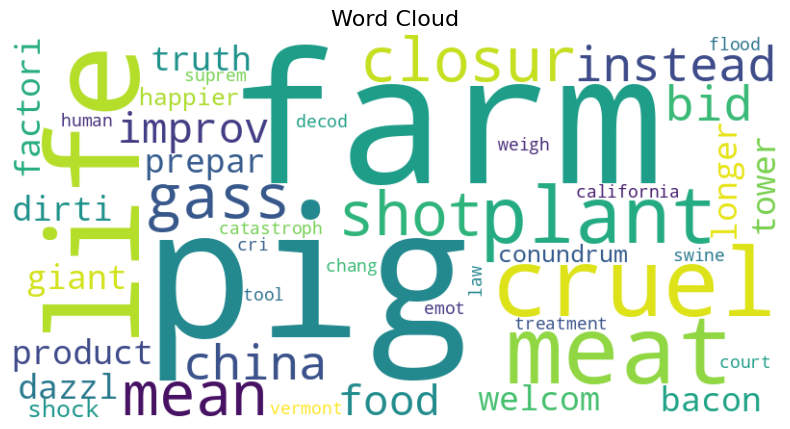

In [ ]:
# Step 4: Generate a Word Cloud
text = " ".join(df["Preprocessed"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=16)
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
#Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

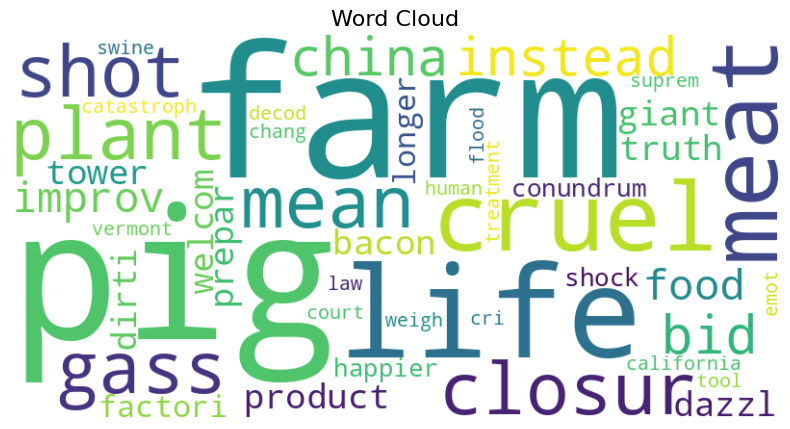

In [ ]:
#Add more words to ignore
text = " ".join(df["Preprocessed"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=16)
plt.show()
stopwords.update(["arriv","rabbit", "factori"])


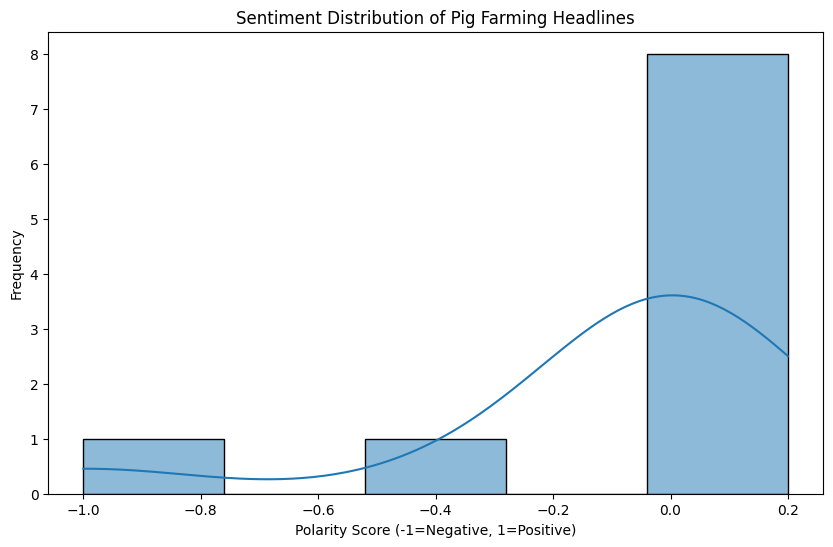

In [ ]:
import seaborn as sns
from textblob import TextBlob

# Applying sentiment analysis to each headline
df['Polarity'] = df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Creating histogram of sentiment scores
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Polarity', bins=5, kde=True)
plt.title('Sentiment Distribution of Pig Farming Headlines')
plt.xlabel('Polarity Score (-1=Negative, 1=Positive)')
plt.ylabel('Frequency')
plt.show()



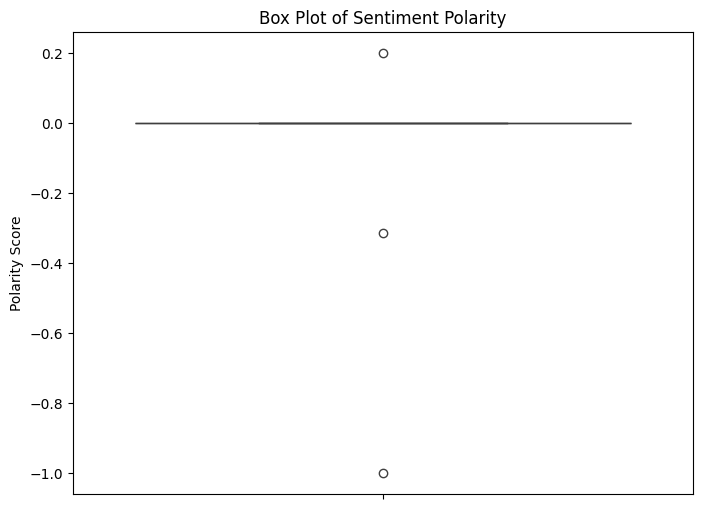

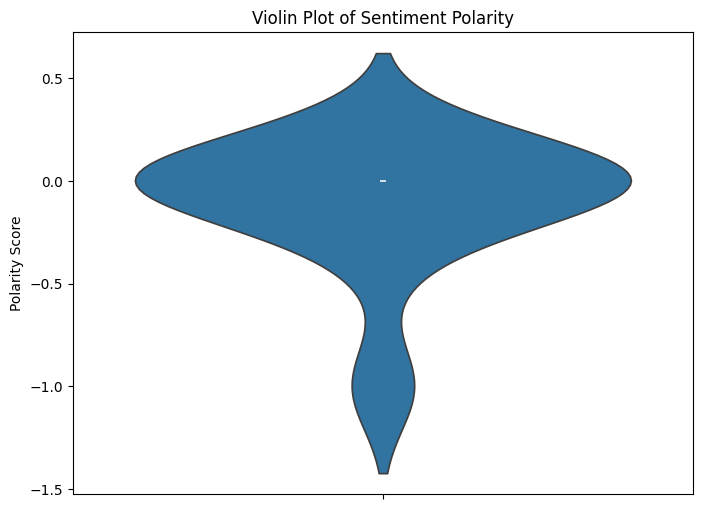

In [ ]:
# Box plot of sentiment polarity
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Polarity'])
plt.title('Box Plot of Sentiment Polarity')
plt.ylabel('Polarity Score')
plt.show()

# Violin plot of sentiment polarity
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Polarity'])
plt.title('Violin Plot of Sentiment Polarity')
plt.ylabel('Polarity Score')
plt.show()